In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
# Loading the dataset
df = pd.read_csv('secondary_mushroom_dataset.csv', sep=';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [3]:
df.shape

(61069, 21)

In [4]:
df.isna().any()

,0
class,False
cap-diameter,False
cap-shape,False
cap-surface,True
cap-color,False
does-bruise-or-bleed,False
gill-attachment,True
gill-spacing,True
gill-color,False
stem-height,False


In [5]:
df.isnull().sum()

,0
class,0
cap-diameter,0
cap-shape,0
cap-surface,14120
cap-color,0
does-bruise-or-bleed,0
gill-attachment,9884
gill-spacing,25063
gill-color,0
stem-height,0


In [6]:
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [7]:
# Drop null values
dropped_df = df.drop(['cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface',
                      'veil-type', 'veil-color', 'ring-type', 'spore-print-color'], axis=1)
dropped_df.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,p,15.26,x,o,f,w,16.95,17.09,w,t,d,w
1,p,16.60,x,o,f,w,17.99,18.19,w,t,d,u
2,p,14.07,x,o,f,w,17.80,17.74,w,t,d,w
3,p,14.17,f,e,f,w,15.77,15.98,w,t,d,w
4,p,14.64,x,o,f,w,16.53,17.20,w,t,d,w


In [8]:
dropped_df.shape

(61069, 12)

In [9]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-color            61069 non-null  object 
 6   stem-height           61069 non-null  float64
 7   stem-width            61069 non-null  float64
 8   stem-color            61069 non-null  object 
 9   has-ring              61069 non-null  object 
 10  habitat               61069 non-null  object 
 11  season                61069 non-null  object 
dtypes: float64(3), object(9)
memory usage: 5.6+ MB


In [10]:
dropped_df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-color', 'stem-height', 'stem-width',
       'stem-color', 'has-ring', 'habitat', 'season'],
      dtype='object')

In [11]:
# Perform Processing
cols_list = ['class', 'cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color',
            'stem-color', 'has-ring', 'habitat', 'season']

labelencoder = LabelEncoder()
for i in cols_list:
    dropped_df[i] = labelencoder.fit_transform(dropped_df[i])
dropped_df.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,1,15.26,6,6,0,10,16.95,17.09,11,1,0,3
1,1,16.60,6,6,0,10,17.99,18.19,11,1,0,2
2,1,14.07,6,6,0,10,17.80,17.74,11,1,0,3
3,1,14.17,2,1,0,10,15.77,15.98,11,1,0,3
4,1,14.64,6,6,0,10,16.53,17.20,11,1,0,3


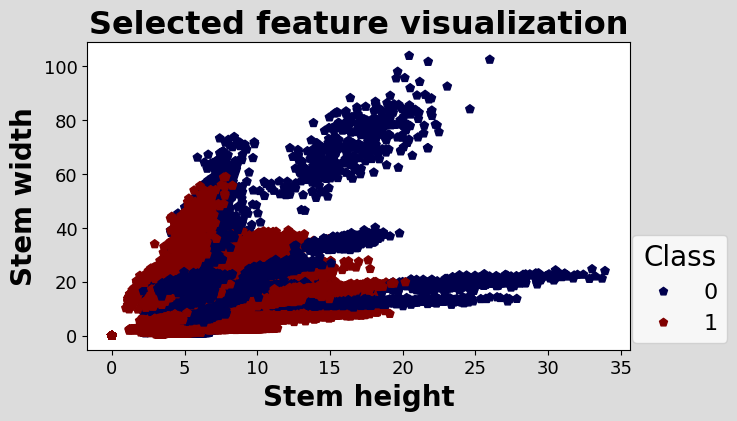

In [12]:
# Visualize selected features
plt.figure(figsize=(7, 4), facecolor='gainsboro')
sc = plt.scatter(dropped_df['stem-height'], dropped_df['stem-width'], s=40, c=dropped_df['class'], marker='p', cmap='seismic')
plt.xlabel('Stem height', fontsize=20, fontweight='bold')
plt.ylabel('Stem width', fontsize=20, fontweight='bold')
plt.title('Selected feature visualization', fontsize=23, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(*sc.legend_elements(), title='Class', fontsize=16, title_fontsize=20, bbox_to_anchor=(1.20, 0.41));


In [13]:
# Separate features and labels
X = dropped_df.drop(['class'], axis=1)
y = dropped_df['class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)
len(X_train), len(X_test), len(y_train), len(y_test)

(48855, 12214, 48855, 12214)

In [14]:
# Apply random forest
rf = RandomForestClassifier(n_estimators=5, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=1)

In [15]:
print(f'Accuracy on the test set: {round(rf.score(X_test, y_test), 4)}')

Accuracy on the test set: 0.9919


In [16]:
# Plot confusion matrix
cat_labels = ['edible', 'poisonous']
y_pred = rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=cat_labels)

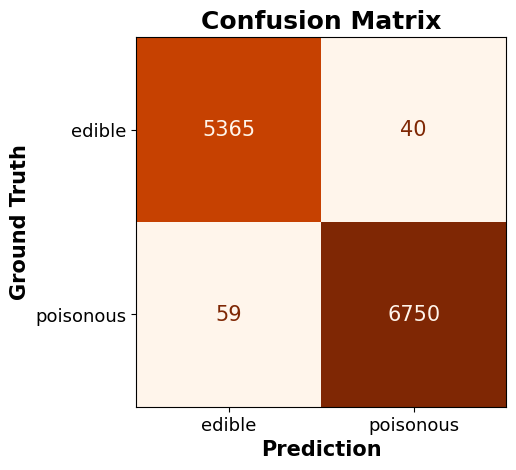

In [17]:
disp.plot(cmap='Oranges', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [18]:
print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred), 4))
print('Precision:', round(metrics.precision_score(y_test, y_pred), 4))
print('Recall:', round(metrics.recall_score(y_test, y_pred), 4))
print('F1 score:', round(metrics.f1_score(y_test, y_pred), 4))
print('Jaccard score:', round(metrics.jaccard_score(y_test, y_pred), 4))


Accuracy: 0.9919
Precision: 0.9941
Recall: 0.9913
F1 score: 0.9927
Jaccard score: 0.9855


In [19]:
# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5405
           1       0.99      0.99      0.99      6809

    accuracy                           0.99     12214
   macro avg       0.99      0.99      0.99     12214
weighted avg       0.99      0.99      0.99     12214



In [20]:
# Plot feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

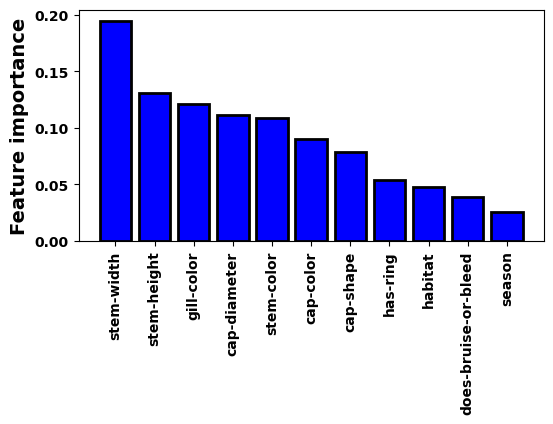

In [21]:
plt.figure(figsize=(6, 3))

plt.bar(range(X_train.shape[1]), importances[indices], align='center', color='b', edgecolor='k', linewidth=2)
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90, fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel('Feature importance', fontsize=14, fontweight='bold');